<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Week 20 Class 2 02/08</h1>
</div>

## Objectives for this week:
* Linear Regressions

## Todays Agenda
* Introduction to Machine Learning
* Linear Regressions





<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Homework Problem</h1>
</div>

# Exercise 1

Given a $m * n$ matrix mat of ones (representing soldiers) and zeros (representing civilians), return the indexes of the $k$ weakest rows in the matrix ordered from the weakest to the strongest.

A row $i$ is weaker than row $j$, if the number of soldiers in row $i$ is less than the number of soldiers in row $j$, or they have the same number of soldiers but $i$ is less than $j$. Soldiers are always stand in the frontier of a row, that is, always ones may appear first and then zeros.

Example 1:
```
Input: mat = 
[[1,1,0,0,0],
 [1,1,1,1,0],
 [1,0,0,0,0],
 [1,1,0,0,0],
 [1,1,1,1,1]], 
k = 3
Output: [2,0,3]
Explanation: 
The number of soldiers for each row is: 
row 0 -> 2 
row 1 -> 4 
row 2 -> 1 
row 3 -> 2 
row 4 -> 5 
Rows ordered from the weakest to the strongest are [2,0,3,1,4]
```
Example 2:
```
Input: mat = 
[[1,0,0,0],
 [1,1,1,1],
 [1,0,0,0],
 [1,0,0,0]], 
k = 2
Output: [0,2]
Explanation: 
The number of soldiers for each row is: 
row 0 -> 1 
row 1 -> 4 
row 2 -> 1 
row 3 -> 1 
Rows ordered from the weakest to the strongest are [0,2,3,1]
```
 

Constraints:

    m == mat.length
    n == mat[i].length
    2 <= n, m <= 100
    1 <= k <= m
    matrix[i][j] is either 0 or 1.


In [ ]:
#%%timeit

def search_for_first_zero(row):
    low, high = 0, len(row) - 1 # subtract one to fix for indexing
    
    while low < high:
        mid = (low + high + 1) // 2 # add 1 to handle odd number arrays
        if not row[mid]:
            high = mid - 1
        else:
            low = mid
    return low + 1

def ex1(matrix, k):
    results = []
    for row in matrix:
        index = search_for_first_zero(row)
        results.append(index)
    return sorted(range(len(results)), key=lambda x: results[x])[:k]

#ex1([[1,1,0,0,0],[1,1,1,1,0],[1,0,0,0,0],[1,1,0,0,0],[1,1,1,1,1]], 3)
#ex1([[1,0,0,0],[1,1,1,1],[1,0,0,0],[1,0,0,0]], 2)

In [ ]:
print(ex1([[1,1,0,0,0],[1,1,1,1,0],[1,0,0,0,0],[1,1,0,0,0],[1,1,1,1,1]], 3))
print(ex1([[1,0,0,0],[1,1,1,1],[1,0,0,0],[1,0,0,0]], 2))

In [ ]:
try:
    assert(ex1([[1,1,0,0,0],[1,1,1,1,0],[1,0,0,0,0],[1,1,0,0,0],[1,1,1,1,1]], 3) == [2,0,3]) 
    assert(ex1([[1,0,0,0],[1,1,1,1],[1,0,0,0],[1,0,0,0]], 2) == [0,2])
    print("solution is correct")
except AssertionError:
    print("solution is incorrect")

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Algorithms</h1>
</div>  


### Algorithms you should know:  
* Arrays
* Queues
* Linked Lists
* Stacks


# Binary Search

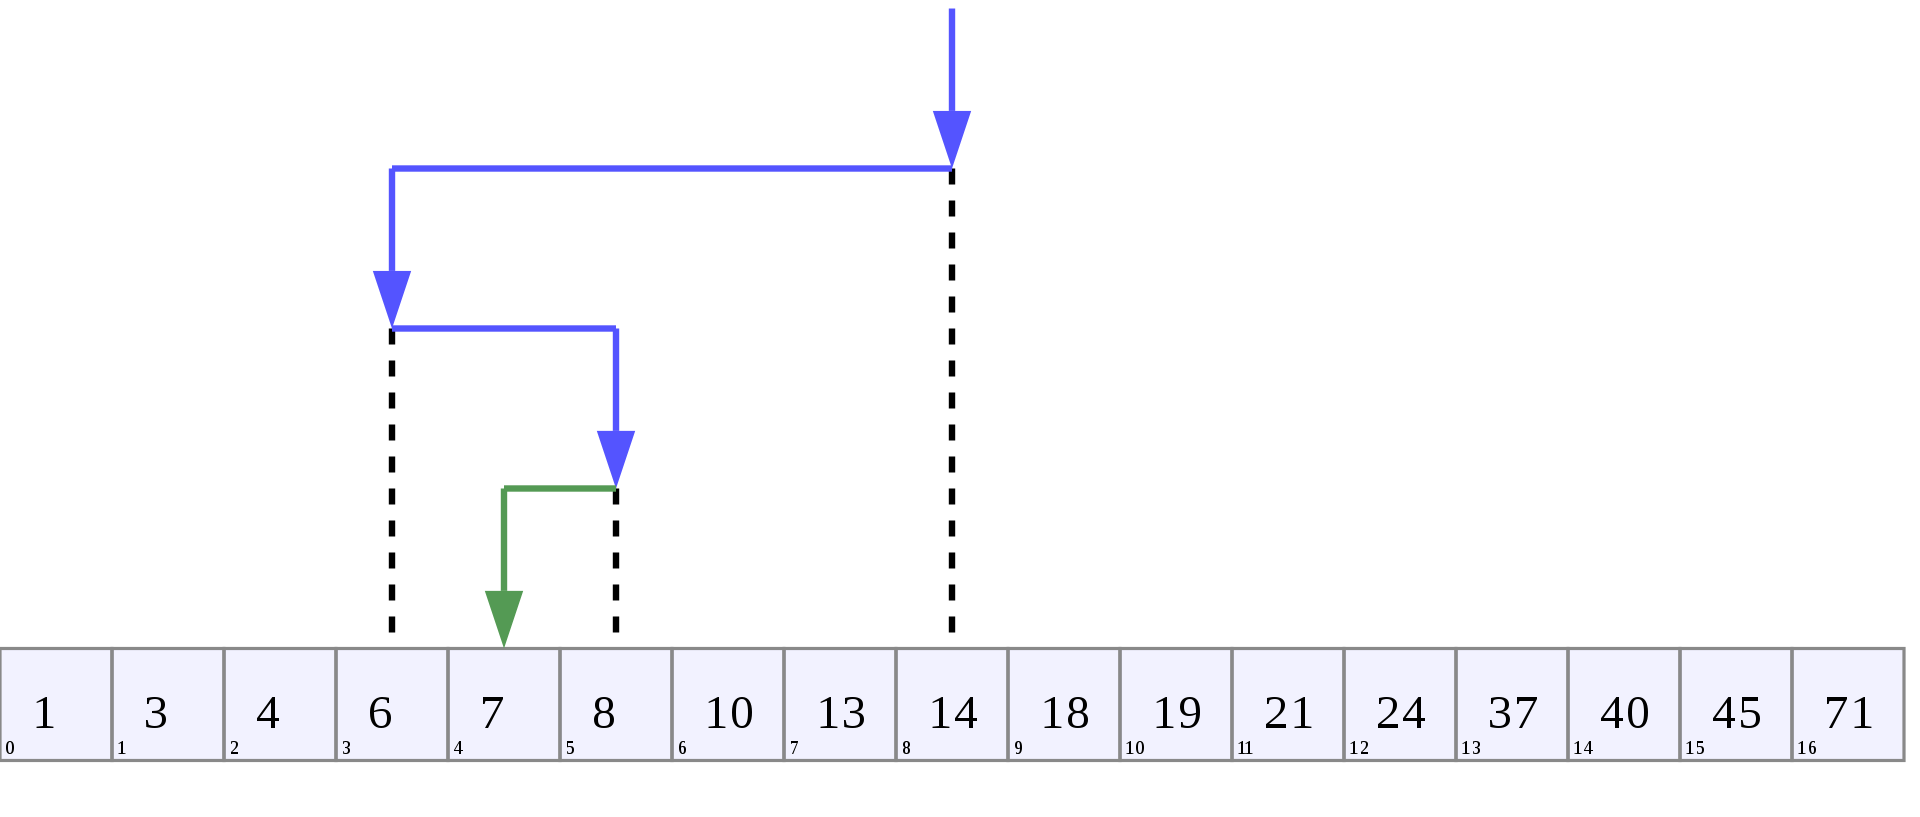

Binary search is the most efficient searching algorithm to find an element. The algorithm works by comparing the middle element of an array or list to the target element. If the values are the same, the index of the element will be returned. If not, the list will be cut in half.

If the target value were less than the middle value, the new list would be the left half. If the target value were greater than the middle value, the new list would be the right half.

This process continues where you keep splitting a list and searching one of the halves until the search algorithm finds the target value and returns the position. The runtime complexity of this algorithm is O(log2n)O(log2n)O(log2n). It’s important to note that binary search only works if the list is already sorted.

To visualize a binary search, let’s say that you have a sorted array with ten elements, and you are looking for an index of 33.
```
[ 4, 6, 7, 11, 16, 21, 23, 28, 33, 34]
                |
          middle value
```

The middle value of this array is 16, and the algorithm compares it to 33. 33 is greater than 16, so the algorithm splits the array and searches in the second half.

```
[ 21, 23, 28, 33, 34 ]
          |
     middle value
```

The new middle value is 28. Because 33 is greater than 28, the algorithm searches in the second half of the array.

```
[ 33, 34 ]
```
After the array is split once again into the right half, the new middle value is 33. The algorithm sees that the middle value and the target value are the same and returns the position of the element.

[source](https://www.educative.io/blog/data-structures-algorithms)

In [ ]:
# Recursive Binary Search
# Returns index of x in arr if present, else -1
def binary_search(arr, low, high, x):
    # Check base case
    if high >= low:
 
        mid = (high + low) // 2
 
        # If element is present at the middle itself
        if arr[mid] == x:
            return mid
 
        # If element is smaller than mid, then it can only
        # be present in left subarray
        elif arr[mid] > x:
            return binary_search(arr, low, mid - 1, x)
 
        # Else the element can only be present in right subarray
        else:
            return binary_search(arr, mid + 1, high, x)
 
    else:
        # Element is not present in the array
        return -1
 
# Test array
arr = [ 2, 3, 4, 10, 40 ]
x = 10
 
# Function call
result = binary_search(arr, 0, len(arr)-1, x)
 
if result != -1:
    print("Element is present at index", str(result))
else:
    print("Element is not present in array")

In [ ]:
# Iterative Binary Search Function
# It returns index of x in given array arr if present,
# else returns -1
def binary_search(arr, x):
    low = 0
    high = len(arr) - 1
    mid = 0
 
    while low <= high:
 
        mid = (high + low) // 2
 
        # If x is greater, ignore left half
        if arr[mid] < x:
            low = mid + 1
 
        # If x is smaller, ignore right half
        elif arr[mid] > x:
            high = mid - 1
 
        # means x is present at mid
        else:
            return mid
 
    # If we reach here, then the element was not present
    return -1
 
 
# Test array
arr = [ 2, 3, 4, 10, 40 ]
x = 10
 
# Function call
result = binary_search(arr, x)
 
if result != -1:
    print("Element is present at index", str(result))
else:
    print("Element is not present in array")


[source](https://www.geeksforgeeks.org/python-program-for-binary-search/)

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>pyplot</h1>
</div>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Plotting with keyword strings
=============================

There are some instances where you have data in a format that lets you
access particular variables with strings. For example, with
`numpy.recarray` or `pandas.DataFrame`.

Matplotlib allows you provide such an object with
the ``data`` keyword argument. If provided, then you may generate plots with
the strings corresponding to these variables.



In [ ]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()


Plotting with categorical variables
===================================

It is also possible to create a plot using categorical variables.
Matplotlib allows you to pass categorical variables directly to
many plotting functions. For example:



In [ ]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(1,3,1)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()


Controlling line properties
===========================

Lines have many attributes that you can set: linewidth, dash style,
antialiased, etc; see `matplotlib.lines.Line2D`.  There are
several ways to set line properties

* Use keyword args::

      plt.plot(x, y, linewidth=2.0)


* Use the setter methods of a ``Line2D`` instance.  ``plot`` returns a list
  of ``Line2D`` objects; e.g., ``line1, line2 = plot(x1, y1, x2, y2)``.  In the code
  below we will suppose that we have only
  one line so that the list returned is of length 1.  We use tuple unpacking with
  ``line,`` to get the first element of that list::

      line, = plt.plot(x, y, '-')
      line.set_antialiased(False) # turn off antialiasing

* Use `~.pyplot.setp`.  The example below
  uses a MATLAB-style function to set multiple properties
  on a list of lines.  ``setp`` works transparently with a list of objects
  or a single object.  You can either use python keyword arguments or
  MATLAB-style string/value pairs::

      lines = plt.plot(x1, y1, x2, y2)
      # use keyword args
      plt.setp(lines, color='r', linewidth=2.0)
      # or MATLAB style string value pairs
      plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

```
Here are the available `~.lines.Line2D` properties.

======================  ==================================================
Property                Value Type
======================  ==================================================
alpha                   float
animated                [True | False]
antialiased or aa       [True | False]
clip_box                a matplotlib.transform.Bbox instance
clip_on                 [True | False]
clip_path               a Path instance and a Transform instance, a Patch
color or c              any matplotlib color
contains                the hit testing function
dash_capstyle           [``'butt'`` | ``'round'`` | ``'projecting'``]
dash_joinstyle          [``'miter'`` | ``'round'`` | ``'bevel'``]
dashes                  sequence of on/off ink in points
data                    (np.array xdata, np.array ydata)
figure                  a matplotlib.figure.Figure instance
label                   any string
linestyle or ls         [ ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'steps'`` | ...]
linewidth or lw         float value in points
marker                  [ ``'+'`` | ``','`` | ``'.'`` | ``'1'`` | ``'2'`` | ``'3'`` | ``'4'`` ]
markeredgecolor or mec  any matplotlib color
markeredgewidth or mew  float value in points
markerfacecolor or mfc  any matplotlib color
markersize or ms        float
markevery               [ None | integer | (startind, stride) ]
picker                  used in interactive line selection
pickradius              the line pick selection radius
solid_capstyle          [``'butt'`` | ``'round'`` | ``'projecting'``]
solid_joinstyle         [``'miter'`` | ``'round'`` | ``'bevel'``]
transform               a matplotlib.transforms.Transform instance
visible                 [True | False]
xdata                   np.array
ydata                   np.array
zorder                  any number
======================  ==================================================
```

To get a list of settable line properties, call the
`~.pyplot.setp` function with a line or lines as argument

```ipython

    In [69]: lines = plt.plot([1, 2, 3])

    In [70]: plt.setp(lines)
      alpha: float
      animated: [True | False]
      antialiased or aa: [True | False]
      ...snip
```


Working with multiple figures and axes
======================================

MATLAB, and :mod:`.pyplot`, have the concept of the current figure
and the current axes.  All plotting functions apply to the current
axes.  The function `~.pyplot.gca` returns the current axes (a
`matplotlib.axes.Axes` instance), and `~.pyplot.gcf` returns the current
figure (a `matplotlib.figure.Figure` instance). Normally, you don't have to
worry about this, because it is all taken care of behind the scenes.  Below
is a script to create two subplots.



In [ ]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(2,1,1)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(2,1,2)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

The `~.pyplot.figure` call here is optional because
``figure(1)`` will be created by default, just as a ``subplot(111)``
will be created by default if you don't manually specify any axes.  The
`~.pyplot.subplot` call specifies ``numrows,
numcols, plot_number`` where ``plot_number`` ranges from 1 to
``numrows*numcols``.  The commas in the ``subplot`` call are
optional if ``numrows*numcols<10``.  So ``subplot(211)`` is identical
to ``subplot(2, 1, 1)``.

You can create an arbitrary number of subplots
and axes.  If you want to place an axes manually, i.e., not on a
rectangular grid, use `~.pyplot.axes`,
which allows you to specify the location as ``axes([left, bottom,
width, height])`` where all values are in fractional (0 to 1)
coordinates. 


You can create multiple figures by using multiple
`~.pyplot.figure` calls with an increasing figure
number.  Of course, each figure can contain as many axes and subplots
as your heart desires::

    import matplotlib.pyplot as plt
    plt.figure(1)                # the first figure
    plt.subplot(211)             # the first subplot in the first figure
    plt.plot([1, 2, 3])
    plt.subplot(212)             # the second subplot in the first figure
    plt.plot([4, 5, 6])


    plt.figure(2)                # a second figure
    plt.plot([4, 5, 6])          # creates a subplot(111) by default

    plt.figure(1)                # figure 1 current; subplot(212) still current
    plt.subplot(211)             # make subplot(211) in figure1 current
    plt.title('Easy as 1, 2, 3') # subplot 211 title

You can clear the current figure with `~.pyplot.clf`
and the current axes with `~.pyplot.cla`.  If you find
it annoying that states (specifically the current image, figure and axes)
are being maintained for you behind the scenes, don't despair: this is just a thin
stateful wrapper around an object oriented API, which you can use
instead (see :doc:`/tutorials/intermediate/artists`)

If you are making lots of figures, you need to be aware of one
more thing: the memory required for a figure is not completely
released until the figure is explicitly closed with
`~.pyplot.close`.  Deleting all references to the
figure, and/or using the window manager to kill the window in which
the figure appears on the screen, is not enough, because pyplot
maintains internal references until `~.pyplot.close`
is called.


Working with text
=================

`~.pyplot.text` can be used to add text in an arbitrary location, and
`~.pyplot.xlabel`, `~.pyplot.ylabel` and `~.pyplot.title` are used to add
text in the indicated locations (see :doc:`/tutorials/text/text_intro` for a
more detailed example)



In [ ]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

All of the `~.pyplot.text` functions return a `matplotlib.text.Text`
instance.  Just as with with lines above, you can customize the properties by
passing keyword arguments into the text functions or using `~.pyplot.setp`::

  t = plt.xlabel('my data', fontsize=14, color='red')

These properties are covered in more detail in :doc:`/tutorials/text/text_props`.


Using mathematical expressions in text
--------------------------------------

matplotlib accepts TeX equation expressions in any text expression.
For example to write the expression $\sigma_i=15$ in the title,
you can write a TeX expression surrounded by dollar signs::

    plt.title(r'$\sigma_i=15$')

The ``r`` preceding the title string is important -- it signifies
that the string is a *raw* string and not to treat backslashes as
python escapes.  matplotlib has a built-in TeX expression parser and
layout engine, and ships its own math fonts -- for details see
:doc:`/tutorials/text/mathtext`.  Thus you can use mathematical text across platforms
without requiring a TeX installation.  For those who have LaTeX and
dvipng installed, you can also use LaTeX to format your text and
incorporate the output directly into your display figures or saved
postscript -- see :doc:`/tutorials/text/usetex`.


Annotating text
---------------

The uses of the basic `~.pyplot.text` function above
place text at an arbitrary position on the Axes.  A common use for
text is to annotate some feature of the plot, and the
`~.pyplot.annotate` method provides helper
functionality to make annotations easy.  In an annotation, there are
two points to consider: the location being annotated represented by
the argument ``xy`` and the location of the text ``xytext``.  Both of
these arguments are ``(x, y)`` tuples.



In [ ]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

In this basic example, both the ``xy`` (arrow tip) and ``xytext``
locations (text location) are in data coordinates.  There are a
variety of other coordinate systems one can choose -- see
`annotations-tutorial` and `plotting-guide-annotation` for
details.  More examples can be found in
:doc:`/gallery/text_labels_and_annotations/annotation_demo`.


Logarithmic and other nonlinear axes
====================================

`matplotlib.pyplot` supports not only linear axis scales, but also
logarithmic and logit scales. This is commonly used if data spans many orders
of magnitude. Changing the scale of an axis is easy:

    plt.xscale('log')

An example of four plots with the same data and different scales for the y axis
is shown below.



In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure(figsize=(14,10))

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)

plt.show()

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Review of things so far:</h1>
</div>

So far we've learned to use the following tools:
* numpy - for handling multidimensional arrays and performing numerical operations on them
* pandas - for dealing with data and performing analysis
* matplotlib/seaborn - for creating visualizations of our data.

We've covered different topics:
* statistics - mostly descriptive statistics to help us get an overview of our data
* probability - counting, combinations, permutations, random variables, expected values, etc.
* mathematics - mostly linear algebra via matrices

We've also covered:
* descriptive statistics
* types of data
* different chart types

This small recap isn't exhaustive and a larger cheatsheet is coming.

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Introduction to Machine Learning Techniques</h1>
</div>




So far, we've taken a look at different data sets. All we've been able to do is analyze past information. We can analyze descriptive statistics like mean, medians, modes, lows, highs, etc. Part of that includes describing our data via charts so we're even able to do that. 

But we would like to delve into inferential statistics. That is, we would like to be able to use our data to make inferences or predictions about future data or at least informed generalizations about past data.

To do this, we must use a number of statistical, probabilistic and mathematical tools that will allow us to quantifiably make conclusions about our data. Machine learning techniques help us to do so.



## There are three main types of machine learning techniques.
1. **Unsupervised Learning**
2. **Supervised Learning**
3. **Reinforcement Learning**

# Unsupervised Learning

Unsupervised learning is a type of algorithm that learns patterns from untagged data. The hope is that through mimicry, the machine is forced to build a compact internal representation of its world. In contrast to Supervised Learning (SL) where data is tagged by a human, eg. as "car" or "fish" etc, UL exhibits self-organization that captures patterns as neuronal predelections or probability densities. The other levels in the supervision spectrum are Reinforcement Learning where the machine is given only a numerical performance score as its guidance, and Semi-supervised learning where a smaller portion of the data is tagged. Two broad methods in UL are Neural Networks and Probabilistic Methods. 

There are a number of different approaches to unsupervised learning:
* Clustering - is the task of grouping a set of objects in such a way that objects in the same group are more similar to each other than those in other groups.
* Anomoly detection - is the identification of rare items, events or observations that stand out as being significantly different from the majority of the data
* Approaches for learning latent variable models - is using observable features to learn 'hidden' features from the data that otherwise would go unnoticed.

## Reinforcement Learning

Reinforcement learning (RL) is an area of machine learning concerned with how intelligent agents ought to take actions in an environment in order to maximize the notion of cumulative reward. Reinforcement learning is one of three basic machine learning paradigms, alongside supervised learning and unsupervised learning.

Reinforcement learning differs from supervised learning in not needing labelled input/output pairs be presented, and in not needing sub-optimal actions to be explicitly corrected. Instead the focus is on finding a balance between exploration (of uncharted territory) and exploitation (of current knowledge).

## Supervised Learning

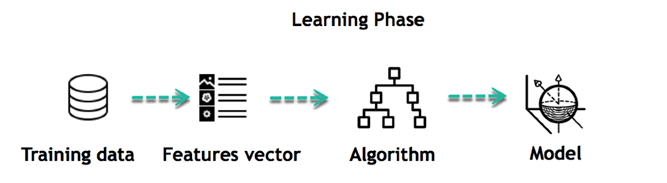

Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples. In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. This requires the learning algorithm to generalize from the training data to unseen situations in a "reasonable" way (see inductive bias).

[source](https://en.wikipedia.org/wiki/Supervised_learning)

Essentially supervised learning involves machine learning where inputs and outputs are used in order to better train the model. We essentially prepare training data with an expected set of outcome to that data. We know if our models are correct based on how closely they predict the expected outcomes. However, we must be careful to avoid things like overfitting our data.

We must also be aware of:
* Bias-variance tradeoff - this tradeoff is essentially due to having to balance variability and bias. Variability is an error where our model is too sensitive to minor changes in the training set. This means for new or different training data, the results might be wildly different even if the inputs are similar. Bias is an error caused by incorrect assumptions in our learning algorithm that causes our model to not detect the relationship between features and target outputs. It's difficult to balance both and we ideally sant to choose a model that accurately captures the regularities of our training data but also generalizes well to unseen data.
* Function complexity and amount of training data - Essentially we need the right training data for our supervised learning algorithms. If the function we're trying to predict is simple, than an "inflexible" learning algorithm with high bias and low variance will be able to learn it. If our functcion t is too complex, we will only be able to use a flexible learning algorithm with low bias and high variance using large amounts of data. 
* Dimensionality of the input space - If we consider too many features, we might be unable to train an effective model even if the true function only depends on a small number of those features.
* Noise in the output values - If our output data is noisy or contains incorrect data, it will throw our model off as training a model that fits this data will be incorrect given new data without such issues. This can be an issue even if we don't have incorrect data but instead if the function we're trying to model is too complex for our learning algorithm

[video on bias-variance tradeoff](https://www.youtube.com/watch?v=qtaqvPAeEJY)

Notes: 
* Features used above can be thought of as our columns in our pandas dataframes. Essentially features are factors that might affect our model and we've seen that we'd like to consider columns/features that are relevant.

There are a number of different supervised learning algorithms:
* Support Vector Machines
* linear regression
* logistic regression
* naive Bayes
* linear discriminant analysis
* decision trees
* k-nearest neighbor algorithm
* Neural Networks (Multilayer perceptron)
* Similarity learning

But there are two main categories:
* Classification
* Regression

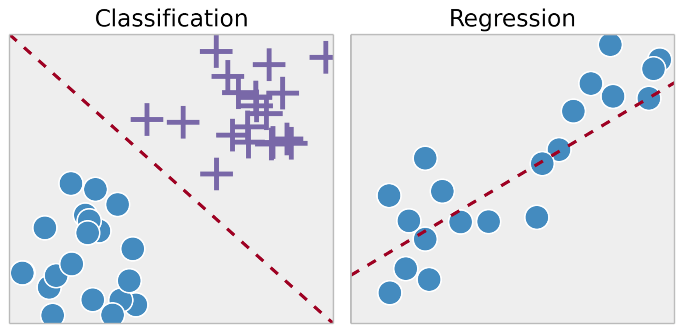

**Classification** seeks to label inputs into distinct classes. If there are only two classes, it's considered binary. If there are more than one it's considered multi classification.

**Regression** seeks to predict a single output value given inputs. 

This week we're going to focus on regression.

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Linear Regressions</h1>
</div>

Before we begin, what can linear regressions be used for?

An example is predicting housing prices. 

Your training data could be data about real estate in an area. The inputs could be neighborhood, size, bedrooms, bathrooms, school districts, crime, etc. You're output data in this situation would be sale prices.

Your regression model would see to take all of the different factors (aka features) and figure out a linear equation that models it. So that given those inputs, you can predict what price the house would get.

Turning this into more of a mathematical framework. For a simple linear regression, we are given a factor as the input ($x$ value) and we'd to predict the sale prices ($y$ value). 

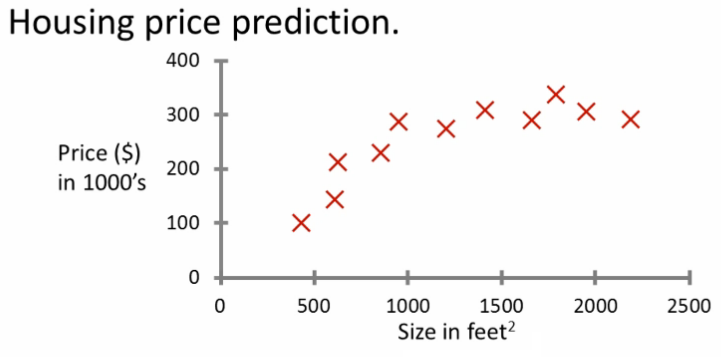

For us to create a generalized prediction model, we need to be able to create a model that, for any value of x, determines the y value. For us to be able to do that, we need to come up with a function that takes values of $x$ and returns values of $y$. When using a linear regression to model this sort of relationship, the function we get is an equation for a line.

Remember the equation for a line?
# $ y = mx +b$

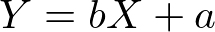
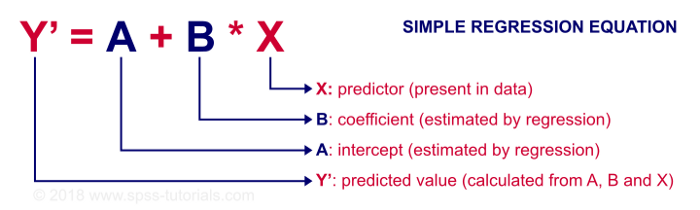

Our linear regression method will give us the equation for that line.

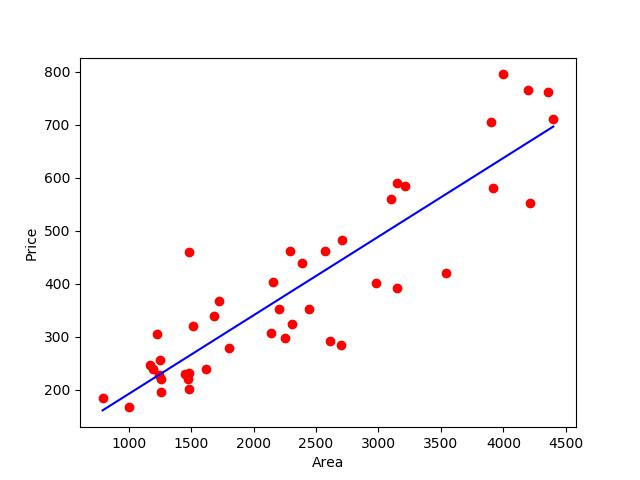

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Linear Regression from scratch</h1>
</div>

taken from [source](https://github.com/snaily16/simple-linear-regression/blob/master/linearregression.ipynb)

For this example, we're seeking to model Swedish insurance claims. If given data about the number of claims and the total cost of those claims, can we find a line that plots this relationship? Then if given any number of claims, we could reasonably predict how much that would cost.

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable.

The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

We will first learn to implement simple linear regression from scratch with python.

## Load Dataset

We will use the swedish insurance dataset to demonstrate simple linear regression. It involves predicting the total payment for all claims in thousands of Swedish Kronor (y) given the total number of claims (x).

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('../datasets/insurance.csv')
df.head()

In [ ]:
df.describe()

## Train test split

In [ ]:
msk = np.random.rand(len(df)) < 0.8

In [ ]:
train_df = df[msk]
test_df = df[~msk]

In [ ]:
print(len(train_df))
print(len(test_df))

## Plot Data

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['X'], df['Y'])
plt.xlabel('number of claims')
plt.ylabel('total payment of claims')
plt.title('Insurance Dataset')
plt.show()

## Calculate Mean, Variance and Covariance

In [ ]:
x = train_df['X'].values
y = train_df['Y'].values

Calculate mean - 
The mean is the average of the numbers: a calculated "central" value of a set of numbers. 

In [ ]:
def mean(values):
    return np.mean(values)

Calculate variance - The average of the squared differences from the Mean

In [ ]:
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

In [ ]:
mean_X, mean_Y = mean(x), mean(y)

In [ ]:
var_x, var_y = variance(x, mean_X), variance(y, mean_Y)

In [ ]:
print(mean_X, var_x)

In [ ]:
print(mean_Y, var_y)

Calculate covariance

In probability theory and statistics, covariance is a measure of the joint variability of two random variables. If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values (that is, the variables tend to show similar behavior), the covariance is positive. In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (that is, the variables tend to show opposite behavior), the covariance is negative. 

[more on covariance](https://www.countbayesie.com/blog/2015/2/21/variance-co-variance-and-correlation)
[video on covariance](https://www.youtube.com/watch?v=qtaqvPAeEJY)

In [ ]:
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x)*(y[i] - mean_y)
    return covar

In [ ]:
covariance(x, mean_X, y, mean_Y)

## Estimate Coefficients 

In the equation y = b0 + b1*x,

b1 = covariance(x,y) / variance(x) and

b0 = mean(y) - b1 * mean(x)

In [ ]:
def coefficients(data):
    a,b = list(data)
    x = data[a].values
    y = data[b].values
    mean_x, mean_y = mean(x), mean(y)
    b1 = covariance(x, mean_x, y, mean_y) / variance(x, mean_x)
    b0 = mean_y - b1 * mean_x
    return [b0, b1]

In [ ]:
coefficients(df)

## Make Predictions 

Once the coefficients are estimated, we can use them to make predictions using this equation,
y = b0 + b1 * x

In [ ]:
predictions = []
b0, b1 = coefficients(train_df)
for i,row in test_df.iterrows():
    ynew = b0 + b1 * row['X']
    predictions.append(ynew)

In [ ]:
predictions

## Plot the predictions 

In [ ]:
x_test = test_df['X'].values
y_test = test_df['Y'].values

In [ ]:
regression_line = [(b0 + b1*x) for x in x_test]
plt.scatter(x_test, test_df['Y'], c='b', label='actual')
plt.plot(x_test, regression_line, c='r', label='prediction')
plt.legend(loc='upper left')
plt.title('Insurance Dataset')
plt.show()

## Calculate root mean squared error (RMS)

In [ ]:
from math import sqrt

def rmse(actual, predicted):
    sum_err = 0.0
    for i in range(len(actual)):
        pred_err = predicted[i] - actual[i]
        sum_err += pred_err**2
    mean_err = sum_err / float(len(actual))
    return sqrt(mean_err)

In [ ]:
rmse(y_test, predictions)